# 1.- Regresión Lineal Ordinaria (LSS)

En esta sección trabajaremos con un dataset conocido como House Sales in King County, USA, presentado
en la plataforma de Kaggle [4], el cual es un gran dataset para evaluar simples modelos de regresión. Los
registros contienen distintas características asociadas a las ventas de casas en la localidad King County, entre
mayo de 2014 y mayo de 2015, las cuales vienen descritas en el dataset, como la cantidad de habitaciones,
cantidad de baños, número de pisos, etc. Donde una de las variables a estudiar corresponde al precio en el
cual se vendió la casa.

  **a)** Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó.
Explique por qué se realiza la línea 4.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


La línea 4 se encarga de eliminar parámetros que no son importantes para la valoración de la vivienda. La función drop toma un arreglo de atributos y los elimina del dataset.

**b)** Describa brevemente el dataset a utilizar.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Como se mustra en la salida anterior, el dataset corresponde a la información de 21613 casa, en donde cada una tiene 18 atributos asociados. Estos atributos corresponden a precio, número de baños, número de dormitorios, superficie del living, superficie total del terreno, número de pisos, entre otros más especificados en las columnas. Además, se presentan la media, la desviaciñon estándar y los cuartiles de cada atributo sobre el dataset total.

**c)** Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir.
Explique la importancia/conveniencia de realizar estas dos operaciones.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

La normalización es necesaria debido a que la mayoría de los algoritmos clasificadores hacen uso de la distancia euclidiana para calcular la distancia entre dos puntos en el dataset. Cuando existe un atributo con un rango de valores mucho mayor en comparación a los demás, este gobernará el calculo de la distancia. Esto puede producir, por ejemplo, que el algoritmo de gradiente (SGD) converja mucho más lento en comparación a una instancia normalizada.

La transformación sobre el precio, por otro lado, es necesaria para utilizar regresión lineal. Las regresiones lineales, tal y como dice su nombre, modelan utilizando rectas. Estas rectas luego son comparadas con los valores del precio para probar que tan bien se ajustan a nuestros valores. No tiene sentido realizar esta comapracion si el precio no sigue una tendencia lineal. Por ejemplo, se estaría intentando ajustar una recta sobre una función cuadratica, lo cual no es correcto. Al aplicar el logaritmo, nos aseguramos que el precio, nuestro ** y **, sea siempre lineal.

**d)** Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del
paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.

In [4]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

En el paso 4, se incorpora una columna de unos para representar a la constante $\beta_0$ en el modelo de la regresión lineal. Esta constante proviene de la expresión:

$H = \beta^TX + \beta_0$

en donde $\beta$ es la matriz de los valores libres asociados con cada atributo en la matriz $X$ y $H$ es la estimación actual.

Los parámetros que se deben entregar a la función de regresión lineal, es la matriz de atributos $X$ y el vector de los valores verdaderos $Y$.

**e)** Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables
están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo
que observa y cuál puede ser la causa?

In [37]:
# Obtención de los pesos
betas = linreg.coef_
col = list(X)
pd.DataFrame([betas], columns=col)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.010467,0.060495,-6.859566e+11,0.022173,0.038332,0.033358,0.041997,0.045268,0.186109,6.184769e+11,3.305463e+11,-0.109915,0.014885,0.186246,-0.004177,0.086068,-0.007039,13.039865


In [40]:
# Obtención de los z-score
from scipy import stats
zscores = stats.zscore(betas)
pd.DataFrame([zscores], columns=col)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.063335,-0.063335,-3.035989,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,2.616891,1.369118,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335


In [41]:
print("pending")

pending


Las variables que están más relacionadas con el precio corresponden a sqft_living de forma negativa, sqft_above de forma positiva y sqft_basemente de forma positiva. Estas variables son la superficie habitable de la vivienda, la superficie total construida sin contar el sótano y la superficie del sótano.

**f)** Proponga un método para corregir lo observado (Hint: inspírese en los métodos de feature engineering
de las siguiente secciones). Verifíquelo mediante los Z-score presentados en la pregunta **e)**.

**g)** Estime el error de predicción del modelo usando validación cruzada con un número de folds igual a K
= 5 y K = 10. Recuerde que para que la estimación sea razonable, en cada configuración (fold) deberá
reajustar los pesos del modelo. Mida el error real del modelo sobre el conjunto de pruebas, compare y
concluya.

In [12]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10

**h)** Mida los errores de predicción para cada dato de entrenamiento. Utilizando un “quantile-quantile plot”
determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

#  2.- Selección de Atributos

Utilizando el dataframe de la actividad anterior,

**a)** Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor.

In [45]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected

names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

NameError: name 'Xm' is not defined

#  3.- Regularización

Utilizando el dataframe de la actividad anterior,

**a)** Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma $\ell_2$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^7, 10^1]$, variando si estima conveniente.
Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización.
Describa lo que observa. (WARNING: Note que la línea 3 y el primer argumento en la línea 9
son críticos).

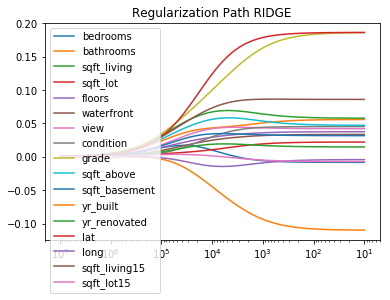

In [44]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

**b)** Ajuste un modelo lineal utilizando el método “Lasso”, es decir, regularizando con la norma $\ell_1$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^0, 10^{-3}]$. Para obtener el código, modifique
las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?

In [46]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
model = Lasso(fit_intercept=True)

**c)** Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un
gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de
regularización. Discuta lo que observa.

In [47]:
test = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
model.set_params(alpha=a)
model.fit(Xtrain, ytrain)
yhat_train = model.predict(Xtrain)
yhat_test = model.predict(Xtest)
mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

SyntaxError: invalid syntax (<ipython-input-47-7e2aa7dc1ea0>, line 3)

**e)** Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de
la técnica validación cruzada.

In [48]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = #choose it
alphas_ = #alphas to evaluate

for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

SyntaxError: invalid syntax (<ipython-input-48-cf530db6d86d>, line 9)

# 4.- Drift

En esta sección se presentarán dos muestras del dataframe utilizado en la actividades anteriores, donde cada
una de estas tiene una propiedad distinta ya que son muestreadas en función del valor a predecir (logaritmo
del precio de la casa). Por una parte se tiene una pequeña muestra A, la cual es extraída directamente de
los datos con los que se trabaja (manteniendo la distribución de esta) y la muestra B, es generada con el
propósito de que en cada intervalo del rango de valores haya la misma cantidad de datos aproximadamente
(simulando una distribución uniforme). El objetivo es familiarizarse con el concepto de Transfer Learning.

En el siguiente código se generan las dos muestras con las que se trabajará.

In [50]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

**a)** Cree el conjunto de entrenamiento y otro de validación para trabajar cada muestra mediante la técnica
de hold out validation.

In [51]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

**b)** Evalúe los dos modelo de regresión lineal que se generan al entrenar con cada muestra. Mida el error
de cada modelo sobre ambos conjuntos de validación (A y B). Explique lo que observa.

**c)** Si tuviera que elegir uno de los dos modelos anteriores para trabajar con data futura, ¿Cuál eligiría y
por qué?

# 5.- Detectar enfermedades cardiacas

En el área de la salud, diagnosticar a una persona de una enfermedad de forma rápida y correcta puede llegar
a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y
ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el medico se llegase a equivocar,
aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando
años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer
errores.
Pongámonos en el contexto de que usted es contratado para generar un modelo que prediga si es que un
paciente presenta una enfermedad cardiaca a partir de ciertos indicadores, tales como la edad, sexo, presión
6 sanguínea, nivel de glicemia, etc.

Como ayuda se le indica que la variable de máximo ritmo cardíaco alcanzado (maximum heart rate achieved)
es un buen indicador de detección de enfermedades cardíacas. Por lo que el objetivo es predecir el comportamiento
de esta variable en función de las otras, y con esto detectar qué tan distante es el valor real al valor
predecido para así luego detectar los posibles outliers (enfermos), que en sí corresponden a pacientes que
tienen un comportamiento anormal al resto.

**a)** Lea el archivo de datos, cárguelos en un dataframe o matriz, luego divida el dataframe en dos, un
dataframe de entrenamiento (70% Datos) y un dataframe de prueba (30% Datos).

In [54]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart','angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv(dataset, header=None, names=headers, sep=' ')
#create your matrix

NameError: name 'dataset' is not defined

**b)** Realice una regresión lineal y defina usted una frontera de decisión (umbral) para poder determinar si
es que estamos en presencia o no de una enfermedad cardíaca. Mida su desempeño con ambos conjuntos
de datos.

In [56]:
from sklearn.metrics import accuracy_score
print "Score: "%(accuracy_score(y_outlier,y_predict_outlier)

SyntaxError: invalid syntax (<ipython-input-56-abac7b85b369>, line 2)